# House Prices: Linear Regression

# Step I: Remember
I am trying to implement here the single-variate linear regression, so I have to pick one feature and the label is the price. For that, just to follow from the provider of the dataset - the book `Grokking Machine Learning`, I will choose number of bedrooms as the feature.

I will do two things in this part.
- Define the types to be used in this file
- Import and prepare the data

In [1]:
import random

from typing import List, Tuple

Feature = float
FeatureVector = List[Feature]
Label = float
Dataset = List[Tuple[FeatureVector, Label]]
LearningRate = float
Epoch = int
Weight = float
Weights = List[Weight]
Bias = float

In [3]:
import csv

with open('diamonds.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    crude_data = list(csv_reader)

data = []
for row in crude_data:
    data.append({'price': 0, 'FeatureVector': []})
    for key, value in row.items():
        if key == 'price':
            data[-1]['price'] = float(value)
        elif key not in  ['cut', 'color', 'clarity']:
            data[-1]['FeatureVector'].append(float(value))

# Step II: Formulate

In [18]:
class MultivariateLinearRigression:
    def __init__(self, dataset: Dataset, learning_rate: LearningRate, epochs: Epoch) -> None:
        self.dataset = dataset
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def multivariate_linear_regression(self) -> None:
        weights: Weights = [random.random() for _ in range(len(self.dataset[0][0]))]
        bias: Bias = random.random()

        for _ in range(self.epochs):
            print(weights, bias)
            feature_vector, label = random.choice(self.dataset)

            weight, bias = self.__square_loss(weights, bias, feature_vector, label)
        
        return weight, bias
    
    def __square_loss(self, weights: Weights, bias: Bias, feature_vector: FeatureVector, label: Label) -> Tuple[Weight, Bias]:
        prediction = self.__predict(weights, bias, feature_vector)
        error = prediction - label

        for i, weight in enumerate(weights):
            weights[i] -= self.learning_rate * feature_vector[i] * error
        bias -= self.learning_rate * error

        return weights, bias
    
    def __predict(self, weights: Weights, bias: Bias, feature_vector: FeatureVector) -> Label:
        return sum(weight * feature for weight, feature in zip(weights, feature_vector)) + bias

# Step III: Predict
The prediction function is the same as that was in the class.

In [19]:
def predict(weights: Weights, bias: Bias, feature_vector: FeatureVector) -> Label:
    return sum(weight * feature for weight, feature in zip(weights, feature_vector)) + bias

# Demonstration

In [21]:
# get the dataset for the multivariate linear regression, the dataset is a list of dictionaries, just convert it to a list of tuples
dataset = [(row['FeatureVector'], row['price']) for row in data]
training_set_size = int(0.8 * len(dataset))

training_set = dataset[:training_set_size]
test_set = dataset[training_set_size:]

mlr = MultivariateLinearRigression(training_set, 0.01, 100_000)
slope, intercept = mlr.multivariate_linear_regression()
print(slope, intercept)

correct_predictions, incorrect_predictions = 0, 0
for feature, label in test_set:
    predicted = predict(slope, intercept, feature)

    if predicted - label < 1000:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

print(f'Accuracy: {correct_predictions / (correct_predictions + incorrect_predictions)}')

[0.852274067284486, 0.5619996931056663, 0.3927708804895186, 0.20554978372595256, 0.11784637578174251, 0.409292482587702, 0.9339465274081536] 0.5736351381690671
[-284683.480694936, -35.671129656527434, -2024.2127901472554, -1843.2343644958532, -210.2885714264737, -207.4544495758338, -132.2386955558925] -31.209811659754713
[2941896800638.413, 29285320.743447777, 5655732433.352475, 5491002484.498903, 399012770.8600461, 403588610.6339456, 248010229.89725703] 91516707.58574282
[-3.464162933499374e+19, -434092987735309.6, -6.39025245242813e+16, -5.75425572303369e+16, -4865879466195226.0, -4835593902292365.0, -3068936430461203.5] -1009518552717316.5
[5.232874934220458e+26, 5.385555353110997e+21, 8.28029138380088e+23, 7.943694210700303e+23, 6.408810900184794e+22, 6.3414914558733e+22, 3.917991528297255e+22] 1.3463888458491405e+22
[-4.529887182456408e+33, -5.850578375803388e+28, -9.530284298255528e+30, -8.467942371150074e+30, -7.143864138757173e+29, -7.236241707294785e+29, -4.449518835173818e+29

ValueError: x and y must be the same size

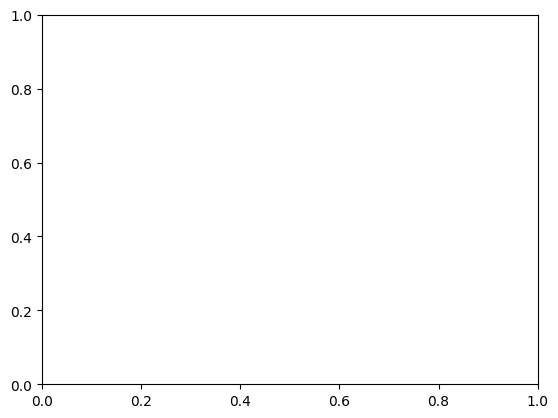

In [9]:
# Ploting the graph
import matplotlib.pyplot as plt

# plot the training set
plt.scatter([feature for feature, label in training_set], [label for feature, label in training_set], color='red')

# plot the test set
plt.scatter([feature for feature, label in test_set], [label for feature, label in test_set], color='blue')

# plot the regression line
plt.plot([feature for feature, label in test_set], [predict(slope, intercept, feature) for feature, label in test_set], color='green')

plt.show()